In [6]:
import spotipy
import spotipy.util as util
import pandas as pd
import matplotlib as plt

class Recents:
    def __init__(self):
        scope = 'user-read-recently-played'
        token = util.prompt_for_user_token('sunnyshikhar', scope, 
                                           client_id='', client_secret='', 
                                           redirect_uri='http://localhost:8888/callback/')
        spotify = spotipy.Spotify(auth=token)

        recently_played = spotify.current_user_recently_played(limit=50)
        last_tracks = recently_played['items']
        row_list = []

        for items in last_tracks:
            song = {}
            song['track_id'] = items['track']['id']
            song['name'] = items['track']['name']
            song['artist'] = items['track']['artists'][0]['name']
            song['artist_id'] = items['track']['artists'][0]['id']
            song['popularity'] = items['track']['popularity']

            features = spotify.audio_features(song['track_id'])
            if features[0] is not None:
                song['energy'] = features[0]['energy']
                song['dance'] = features[0]['danceability']
                song['liveness'] = features[0]['liveness']
                song['valence'] = features[0]['valence']
                song['tempo'] = features[0]['tempo']
                song['instrumental'] = features[0]['instrumentalness']
                song['duration'] = features[0]['duration_ms']
                song['key'] = features[0]['key']
                song['mode'] = features[0]['mode']
                song['time_signature'] = features[0]['time_signature']

            row_list.append(song)
        
        self.recently_played = pd.DataFrame(row_list)
#         self.recently_played = pd.read_csv('recently_played.csv')

    
    def get_max_feature(self, feature):
        return(max(self.recently_played[feature]))

    def get_min_feature(self, feature):
        return(min(self.recently_played[feature]))

    def get_mean_feature(self, feature):
        return(self.recently_played[feature].mean())

    def get_median_feature(self, feature):
        return(self.recently_played[feature].mean())

    def get_boxplot_feature(self, feature):
        return(self.recently_played.boxplot(column=feature))


97
8


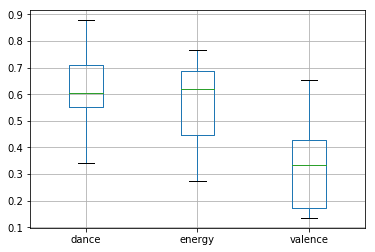

In [10]:
# Initial Analysis
recent_tracks = Recents()
recent_tracks.get_boxplot_feature(['dance', 'energy', 'valence'])
print(recent_tracks.get_max_feature('popularity'))
print(recent_tracks.get_min_feature('popularity'))

In [12]:
recent_tracks.recently_played.head()

,artist,artist_id,dance,duration,energy,instrumental,key,liveness,mode,name,popularity,tempo,time_signature,track_id,valence
0,$VN,4NEt5HGE8taZRmwjdQzQvR,0.606,196201,0.486,0.000007,11,0.100,0,Heartbreak Holiday,28,114.876,4,1fAE1KAE661YWyjvk7nYCB,0.135
1,Lil Nas X,7jVv8c5Fj3E9VhNjxT4snq,0.878,157067,0.619,0.000000,6,0.113,1,Old Town Road - Remix,97,136.041,4,6u7jPi22kF8CTQ3rb9DHE7,0.639
2,THEY.,0pghUohLPptZWBasy2wmUx,0.708,159787,0.721,0.000046,11,0.407,0,Pops,56,160.061,4,5qEzURrIp2mJbfgBXNnQeD,0.653
3,LocoCity,3F8zBQBtVl3lb2bEQHBFou,0.652,169718,0.768,0.000000,9,0.106,1,Krazy,43,159.930,4,30VMAMNkr00nJrrj6jAuUb,0.333
4,THEY.,0pghUohLPptZWBasy2wmUx,0.708,159787,0.721,0.000046,11,0.407,0,Pops,56,160.061,4,5qEzURrIp2mJbfgBXNnQeD,0.653
